In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
path=r"C:\\Users\\devma\\OneDrive\\Desktop\\Project\\NEW_PICKLE\\"
X=pickle.load(open((path+"XS_1.pickle"),'rb'))
y=pickle.load(open((path+"yS_1.pickle"),'rb'))

X=X/255.0
y = np.array(y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model=SVC(kernel='linear', gamma='auto', probability=True).fit(X_train, y_train)

In [4]:
y_pred=model.predict(X_test)
print(y_pred)
print(y_test)

y_pred[:100]

[1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

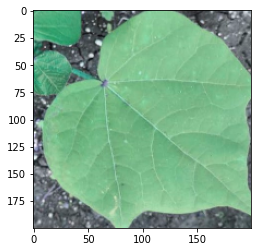

In [13]:
import cv2
img_array=cv2.imread("h366.jpg")
new_array = cv2.resize(img_array, (200, 200))
k=np.array(new_array).reshape(-1,120000)
k=k/255.0
plt.imshow(new_array)
plt.show()

In [14]:
pre=model.predict(k)
print(pre)

[0]


In [7]:
conf=model.predict_proba(k)
print(conf*100)

[[10.99960851 89.00039149]]


In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.890625


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       129
           1       0.94      0.92      0.93       383

    accuracy                           0.89       512
   macro avg       0.85      0.87      0.86       512
weighted avg       0.89      0.89      0.89       512



In [16]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

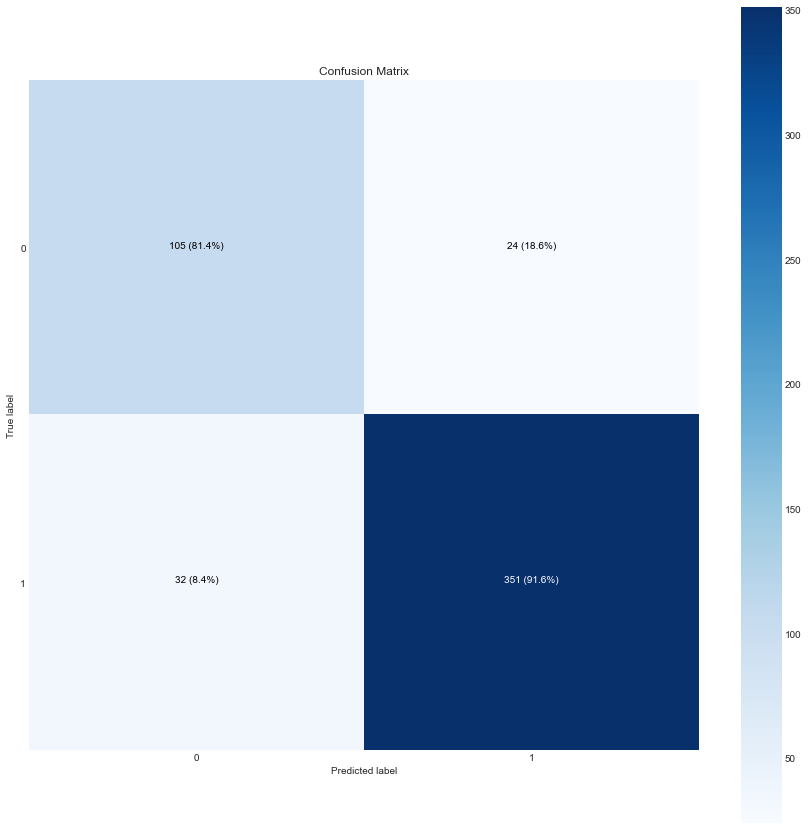

In [17]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      figsize=(15, 15),
                      text_size=10)